### REGRESSION in PYTHON:

##### Loading datasets usually available in R - From [here](https://stackoverflow.com/a/34943480/4089351)

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.stats.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import add_constant

### Regression with seaborn:

In [136]:
iris = sns.load_dataset("iris")

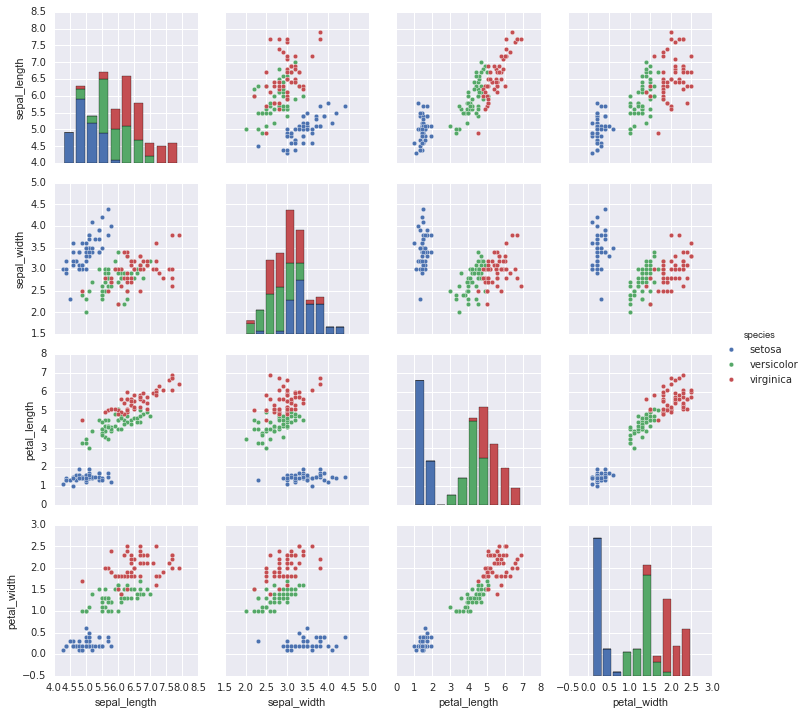

In [137]:
sns.pairplot(iris, hue="species")
sns.plt.show()

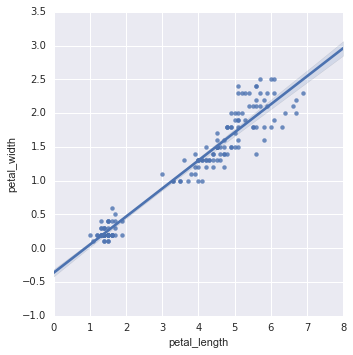

In [138]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)
sns.plt.show()

### Regression with statsmodels:

In [122]:
from pydataset import data
iris = data('iris')

In [123]:
iris['Sepal.Length'][1:3]

2    4.9
3    4.7
Name: Sepal.Length, dtype: float64

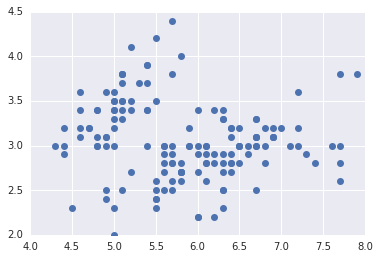

In [124]:
plt.plot(iris['Sepal.Length'], iris['Sepal.Width'], "o")

In [125]:
fit = ols(y = iris['Sepal.Length'], x  = iris['Petal.Width'])
fit

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         150
Number of Degrees of Freedom:   2

R-squared:         0.6690
Adj R-squared:     0.6668

Rmse:              0.4780

F-stat (1, 148):   299.1673, p-value:     0.0000

Degrees of Freedom: model 1, resid 148

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.8886     0.0514      17.30     0.0000     0.7879     0.9893
     intercept     4.7776     0.0729      65.51     0.0000     4.6347     4.9206
---------------------------------End of Summary---------------------------------

In [126]:
mod = sm.OLS(iris['Sepal.Length'],add_constant(iris['Petal.Width']))

In [127]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Sepal.Length   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     299.2
Date:                Tue, 06 Jun 2017   Prob (F-statistic):           2.33e-37
Time:                        13:08:55   Log-Likelihood:                -101.11
No. Observations:                 150   AIC:                             206.2
Df Residuals:                     148   BIC:                             212.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.7776      0.073     65.506      

In [128]:
mod.fit().params

const          4.777629
Petal.Width    0.888580
dtype: float64

In [129]:
mtcars = data('mtcars')

In [130]:
mtcars[0:3:]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [131]:
gen = smf.glm(formula = "mtcars['cyl'] ~ mtcars['mpg']", data = mtcars, family=sm.families.Poisson()).fit()

In [132]:
print(gen.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          mtcars['cyl']   No. Observations:                   32
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -60.471
Date:                Tue, 06 Jun 2017   Deviance:                       4.2822
Time:                        13:08:55   Pearson chi2:                     4.19
No. Iterations:                     7                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.6857      0.255     10.522      0.000         2.185     3.186
mtcars['mpg']    -0.0446      0.013     -3.